In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

data = pd.read_csv("filename.csv")
print(data.head())

                    id      conversation_id               created_at  \
0  1562977659633602560  1562859828112146432  2022-08-26 01:38:07 UTC   
1  1562977657255383043  1562764128619724802  2022-08-26 01:38:06 UTC   
2  1562977647411351553  1562682823445581824  2022-08-26 01:38:04 UTC   
3  1562977644232462337  1562977644232462337  2022-08-26 01:38:03 UTC   
4  1562977643347054592  1562827814747123712  2022-08-26 01:38:03 UTC   

         date      time  timezone              user_id         username  \
0  2022-08-26  01:38:07         0  1499438973466382336  christopherzuby   
1  2022-08-26  01:38:06         0   717189498770235392        tonyapc42   
2  2022-08-26  01:38:04         0  1551717892609126401        yoynoti2i   
3  2022-08-26  01:38:03         0            591641429  brokerevstropov   
4  2022-08-26  01:38:03         0   810590426013044738          barkoad   

                       name  \
0                Chris Zuby   
1      Tesla was Robbed! 🇺🇸   
2                  RJ I

In [3]:
print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


In [4]:
#focus on three column
data = data[["username", "tweet", "language"]]

In [5]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [6]:
#how many tweets are posted in which language
data["language"].value_counts()

en     8656
pt      419
it      247
qme     160
ja       91
in       59
und      57
ru       55
es       46
zh       23
fr       22
ca       20
nl       16
qht      15
uk       15
de       14
fi       12
th       10
zxx       8
ro        8
tr        6
vi        5
ar        5
ur        4
cs        4
pl        4
tl        3
da        3
el        2
sr        2
ht        2
hi        2
ta        2
et        2
art       1
bn        1
qam       1
hu        1
eu        1
lt        1
gu        1
Name: language, dtype: int64

In [7]:
#remove all the links, punctuation, symbols and other language errors from the tweets
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


show the most frequently used words in the tweets by people sharing their feelings and updates about the Ukraine and Russia war

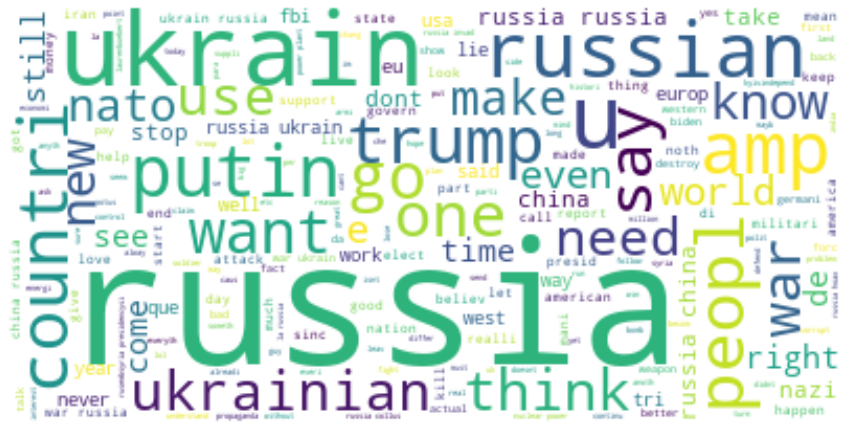

In [8]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the tweets

In [9]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())  

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...


                                               tweet  Positive  Negative  \
0                 understand russia doesnt ncos west     0.000     0.000   
1  achilleorti rwapodcast must admit state protec...     0.370     0.000   
2   rynkrynk hear voic war russia fascism youv fo...     0.245     0.226   
3                 нашёл сокровища💰💰💰  sochi russia       0.000     0.000   
4   untrain underpaid unwil russian soldier  rip ...     0.000     0.425   

   Neutral  
0    1.000  
1    0.630  
2    0.529  
3    1.000  
4    0.575  


look at the most frequent words used by people with positive sentiments

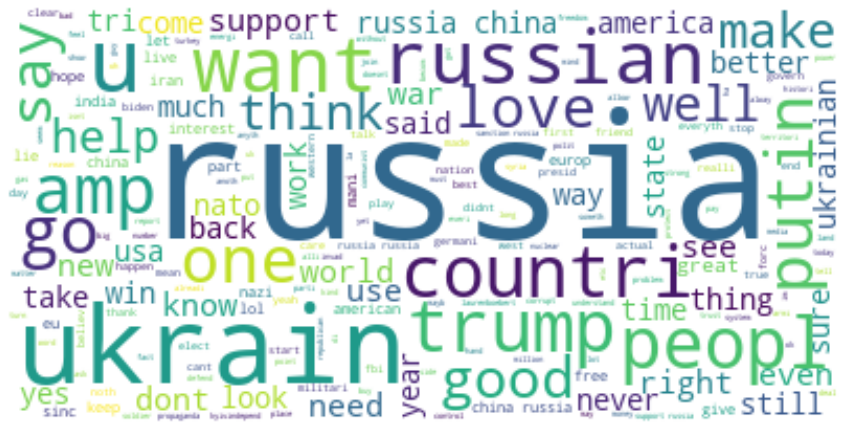

In [10]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

look at the most frequent words used by people with negative sentiments

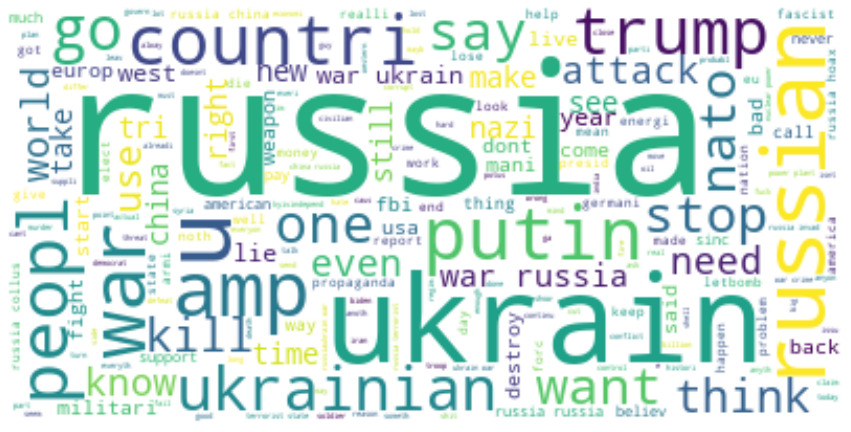

In [11]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()